# **Assignment-1**
**Name - Ritik Gautam**


**Roll No - B180630CS**



Q. Take a real image( Your own color photograph of size 256x256) and do the following:


a) Read it to memory from the file

b) Display it 

c) Read a portion of it to memory

d) display it

e) add a constant to this portion and then display it

f) display the whole image after adding a constant to a portion of it. Take care of 
overflow while adding. ( on overflow, take the pixel vale as the maximum possible )

g) multiply a portion of the image by a constant ranging from 0.1 to 2.0, truncating to 
maximum value on over flow. Display the resulting image for each value of the constant
multiplier.

h) Create a second image which contains only your name and date of doing the 
assignment, and embed this to to your photograph as a visible watermark.

i) Embed the second image(name &date) as an invisible watermark in your photograph.
(also write code for extracting the watermark)

j) Embed a text message in the image.(Text message should be your name and roll no.)

k) Convert the RGB image into XYZ Color Space and Display the luminance and 
chrominance images separately.

 l) Convert the Color image into a grayscale image.

m)Apply thresholding on the grayscale using 4 different threshold values(e.g, 50, 128, 
175, & 220) and display the 4 output images


**Solution:**

In [83]:
import cv2
from PIL import Image,ImageDraw
import numpy as np
import matplotlib.pyplot as plt

***a*) Read it to memory from the file**

In [84]:
img = cv2.imread('/content/My Photo.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('Size of the image ->',img.shape)

Size of the image -> (256, 256, 3)


**b) Display Image**


Text(0.5, 1.0, 'Image')

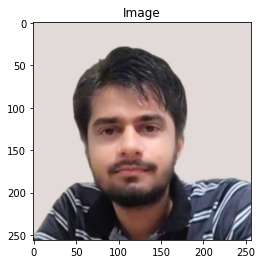

In [85]:
plt.imshow(img)
plt.title("Image")

**c) Read Portion of image**

In [86]:
img1 = img.copy()
portion_img = img1[80:175, 70:160,:]

**d) Display Portion**

Text(0.5, 1.0, 'Image Portion')

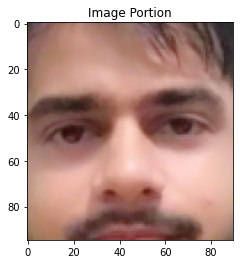

In [87]:
plt.imshow(portion_img)
plt.title("Image Portion")

**e) Add constant to the portion and display it**

Text(0.5, 1.0, 'Constant Added Portion Image')

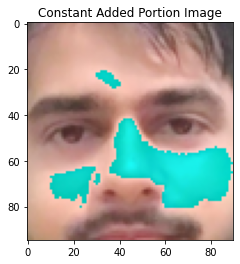

In [88]:
portion_img += 28
plt.imshow(portion_img)
plt.title("Constant Added Portion Image")

**f) display the whole image after adding a constant to a portion of it.**

Text(0.5, 1.0, 'Constant Added Full Image')

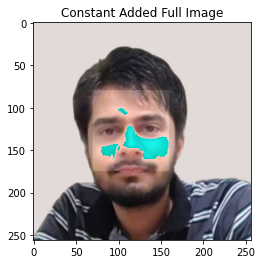

In [89]:
img1[img1 > 255] = 255
plt.imshow(img1)
plt.title("Constant Added Full Image")

**g) Multiply a portion of the image by a constant ranging from 0.1 to 2.0**

Text(0.5, 1.0, 'Multiplied Image Portion')

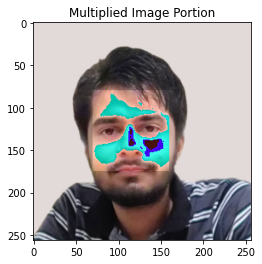

In [90]:
img1 = img.copy()
portion_img = img1[80:175, 70:160,:]
np.multiply(portion_img, 1.3, out = portion_img, casting='unsafe')
img1[img1 > 255] = 255
plt.imshow(img1)
plt.title("Multiplied Image Portion")

**h) Read watermark from image and embed it to photograph.**

Text(0.5, 1.0, 'Watermark Image')

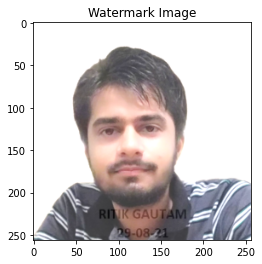

In [91]:
#  Reading the watermark
watermark = cv2.imread('/content/watermark_256.jpeg')
img2 = img.copy()
cv2.addWeighted(watermark, 0.2, img2, 1, 0, img2)
plt.imshow(img2)
plt.title("Watermark Image")

**i) Embed an invisible watermark from image**

Text(0.5, 1.0, 'Watermark')

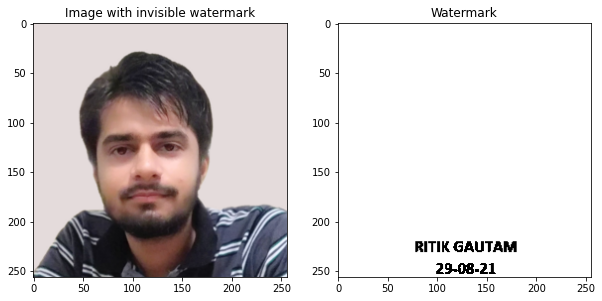

In [92]:
watermarkedImage=img.copy()
invisiblewatermark=img.copy()

opacity = 0.01

watermarkedImage = watermarkedImage + watermark*opacity
watermarkedImage[watermarkedImage>255] = 255
watermarkedImage=watermarkedImage.astype('uint8')

rows, cols = 1,2
fig = plt.figure(figsize=(10,10))

fig.add_subplot(rows, cols, 1)
plt.imshow(watermarkedImage)
plt.title("Image with invisible watermark")

# Code to retrieve invisible watermark
l,b,d = img.shape
for i in range(l):
    for j in range(b):
        for k in range(d):
            if(watermarkedImage[i,j,k] != 255): # Since we don't have to subtract initial pixels intensites from the pixel int
                invisiblewatermark[i,j,k] = (watermarkedImage[i,j,k] - invisiblewatermark[i,j,k])/opacity
                                         
invisiblewatermark [invisiblewatermark>128] = 255
invisiblewatermark [invisiblewatermark<=128] = 0
                                         
fig.add_subplot(rows,cols,2)
plt.imshow(invisiblewatermark)
plt.title("Watermark")

**j) Embed watermark from text**

Text(0.5, 1.0, 'Text Watermark')

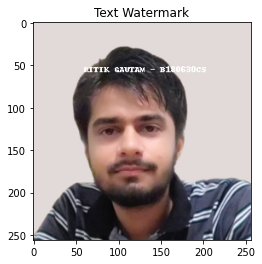

In [93]:
img2 = Image.open('/content/My Photo.png')
draw = ImageDraw.Draw(img2)

text = "RITIK GAUTAM - B180630CS"
draw.text((60,50),text)
plt.imshow(img2)
plt.title("Text Watermark")

**k) RGB to XYZ colorspace conversion**

Text(0.5, 1.0, 'Luminance and chrominance image')

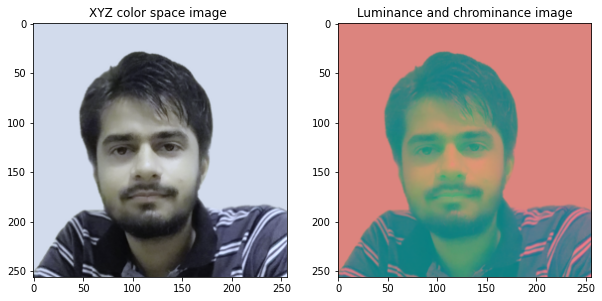

In [94]:
XYZ_img = cv2.cvtColor(img, cv2.COLOR_RGB2XYZ)
lum_crom_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

rows,cols = 1,2
fig = plt.figure(figsize=(10,10))

fig.add_subplot(rows,cols,1)
plt.imshow(XYZ_img)
plt.title("XYZ color space image ")

fig.add_subplot(rows,cols,2)
plt.imshow(lum_crom_img)
plt.title("Luminance and chrominance image")

**l) Color to Grayscale conversion**

Text(0.5, 1.0, 'Grayscale Image')

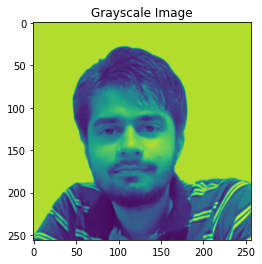

In [95]:
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale)
plt.title("Grayscale Image")

**m)Thresholding**

Text(0.5, 1.0, 'Threshold value = 220')

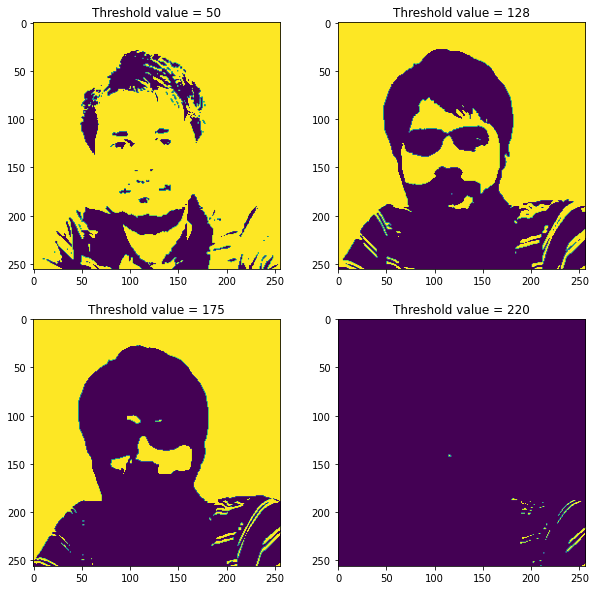

In [96]:
ret, thresh1 = cv2.threshold(grayscale, 50, 256, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(grayscale, 128, 256, cv2.THRESH_BINARY)
ret, thresh3 = cv2.threshold(grayscale, 175, 256, cv2.THRESH_BINARY)
ret, thresh4 = cv2.threshold(grayscale, 220, 256, cv2.THRESH_BINARY)

rows,cols = 2,2
fig = plt.figure(figsize=(10,10))

fig.add_subplot(rows,cols,1)
plt.imshow(thresh1)
plt.title("Threshold value = 50")

fig.add_subplot(rows,cols,2)
plt.imshow(thresh2)
plt.title("Threshold value = 128")

fig.add_subplot(rows,cols,3)
plt.imshow(thresh3)
plt.title("Threshold value = 175")

fig.add_subplot(rows,cols,4)
plt.imshow(thresh4)
plt.title("Threshold value = 220")